# Laboratorio 2

##### Javier Valle 20159
##### Mario de León 19026

## Haciendo análisis exploratorio.

In [1493]:
# Imports necesarios.
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import numpy as np
import re
from statsmodels.tsa.arima.model import ARIMA
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

### Inciso 1: Análisis exploratorio

In [1494]:
# Abriendo el csv.
df = pd.read_csv('data.csv')

df

# Visualizando la data del csv.
print("Encabezados")
print(df.head())


Encabezados
                 Fecha  Aceites lubricantes  Asfalto      Bunker  Ceras   
0  2001-01-01 00:00:00                  0.0  27748.99  214581.84    0.0  \
1  2001-02-01 00:00:00                  0.0   7503.57  294609.00    0.0   
2  2001-03-01 00:00:00                  0.0  26304.32  315263.80    0.0   
3  2001-04-01 00:00:00                  0.0   7885.89  205653.00    0.0   
4  2001-05-01 00:00:00                  0.0   8443.16  278371.30    0.0   

   Combustible turbo jet  Diesel bajo azufre  Diesel ultra bajo azufre   
0                    0.0                 0.0                       0.0  \
1                    0.0                 0.0                       0.0   
2                    0.0                 0.0                       0.0   
3                    0.0                 0.0                       0.0   
4                    0.0                 0.0                       0.0   

   Gas licuado de petróleo  Gasolina de aviación  ...  Naftas  Petcoke   
0            19406

In [1495]:
# Viendo la info del csv.
print("Información")
print(df.info())

Información
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fecha                     269 non-null    object 
 1   Aceites lubricantes       269 non-null    float64
 2   Asfalto                   269 non-null    float64
 3   Bunker                    269 non-null    float64
 4   Ceras                     268 non-null    float64
 5   Combustible turbo jet     269 non-null    float64
 6   Diesel bajo azufre        269 non-null    float64
 7   Diesel ultra bajo azufre  269 non-null    float64
 8   Gas licuado de petróleo   269 non-null    float64
 9   Gasolina de aviación      269 non-null    float64
 10  Gasolina regular          269 non-null    float64
 11  Gasolina superior         269 non-null    float64
 12  Grasas lubricantes        269 non-null    float64
 13  Kerosina                  269 non-null    float64
 14

In [1496]:
# Sacando algunas estadísticas del csv.
print("Estadísticas")
print(df.describe())

Estadísticas
       Aceites lubricantes       Asfalto         Bunker       Ceras   
count           269.000000     269.000000  2.690000e+02  268.000000  \
mean           4925.849217    8377.068161  2.932919e+05   66.469142   
std           10361.422569   15540.817631  1.732186e+05  169.789987   
min               0.000000       0.000000  8.484760e+03    0.000000   
25%               0.000000    2746.310000  1.561090e+05    0.000000   
50%               0.000000    5405.190476  2.804147e+05    0.000000   
75%               0.000000    9947.000000  4.072329e+05    0.000000   
max           46934.140000  171826.960000  1.051764e+06  920.120000   

       Combustible turbo jet  Diesel bajo azufre  Diesel ultra bajo azufre   
count             269.000000        2.690000e+02                269.000000  \
mean            23354.625985        2.707193e+05               2644.297993   
std             39079.450100        4.923333e+05               8639.971237   
min                 0.000000       

#### Explorando las variables de de gasolinas regular, super, diesel y gas licuado.

#### Quitando NaN en las columnas 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', "Gasolina regular",'Gas licuado de petróleo'

In [1497]:
# Quitando NaN en estas columnas: 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', "Gasolina regular",'Gas licuado de petróleo'

df.fillna(0, inplace=True)

0      177776.50
1      123115.99
2      161726.42
3      127338.74
4      168730.19
         ...    
264    909391.13
265    725101.20
266    803262.67
267    922032.39
268    947633.29
Name: Gasolina regular, Length: 269, dtype: float64
count       269.000000
mean     381883.121315
std      219364.354874
min       81015.300000
25%      201907.670000
50%      305285.530000
75%      528347.810000
max      987872.050000
Name: Gasolina regular, dtype: float64


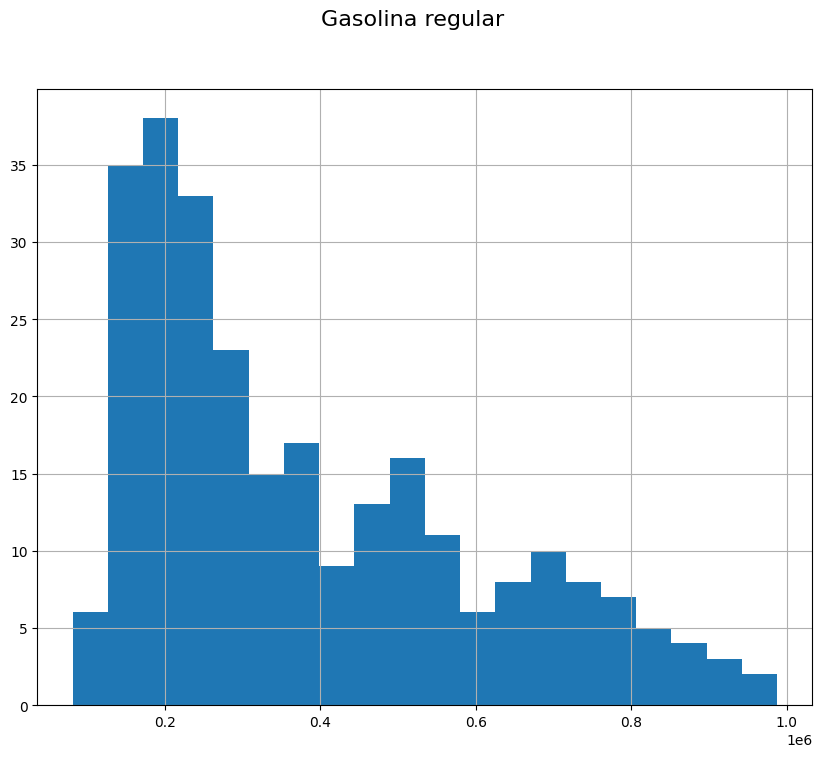

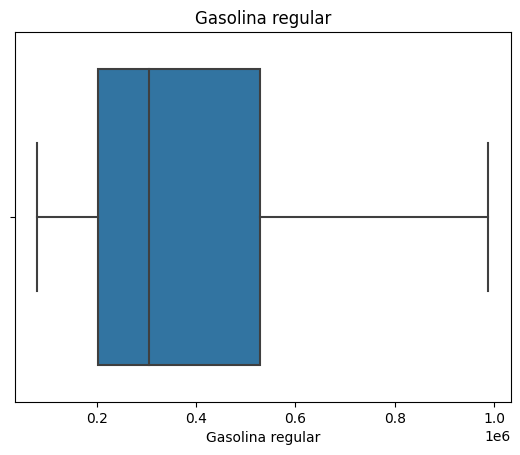

In [1498]:
# Gasolina regular.
print(df["Gasolina regular"])

print(df["Gasolina regular"].describe())

# Histogramas de todas las columnas numéricas
df["Gasolina regular"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Gasolina regular', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Gasolina regular', data=df)
plt.title('Gasolina regular')
plt.show()

0      373963.96
1      243091.07
2      312084.38
3      285054.89
4      300913.67
         ...    
264    578792.14
265    685183.06
266    633849.05
267    572201.36
268    668478.73
Name: Gasolina superior, Length: 269, dtype: float64
count    2.690000e+02
mean     4.782882e+05
std      1.532780e+05
min      1.702925e+05
25%      3.633527e+05
50%      4.565884e+05
75%      5.823743e+05
max      1.227174e+06
Name: Gasolina superior, dtype: float64


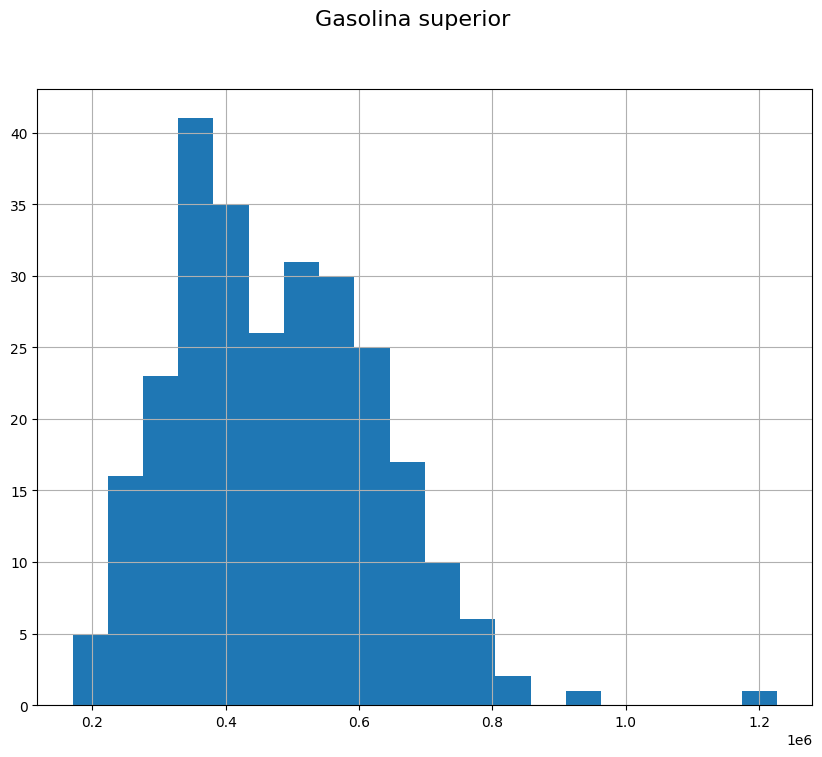

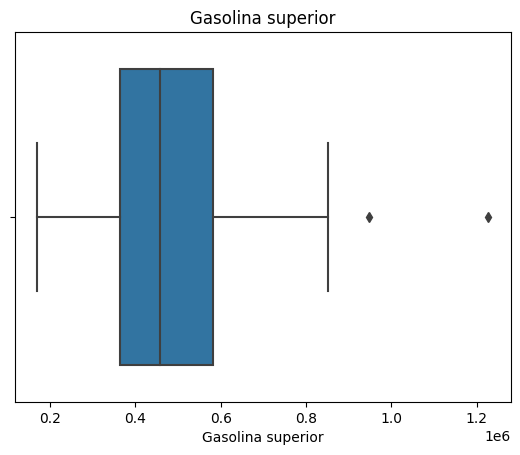

In [1499]:
# Gasolina superior.
print(df["Gasolina superior"])

print(df["Gasolina superior"].describe())

# Histogramas de todas las columnas numéricas
df["Gasolina superior"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Gasolina superior', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Gasolina superior', data=df)
plt.title('Gasolina superior')
plt.show()

0            0.00
1            0.00
2            0.00
3            0.00
4            0.00
          ...    
264    1442099.08
265    1267967.39
266    1317519.91
267    1417182.73
268    1428099.62
Name: Diesel bajo azufre, Length: 269, dtype: float64
count    2.690000e+02
mean     2.707193e+05
std      4.923333e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.592580e+06
Name: Diesel bajo azufre, dtype: float64


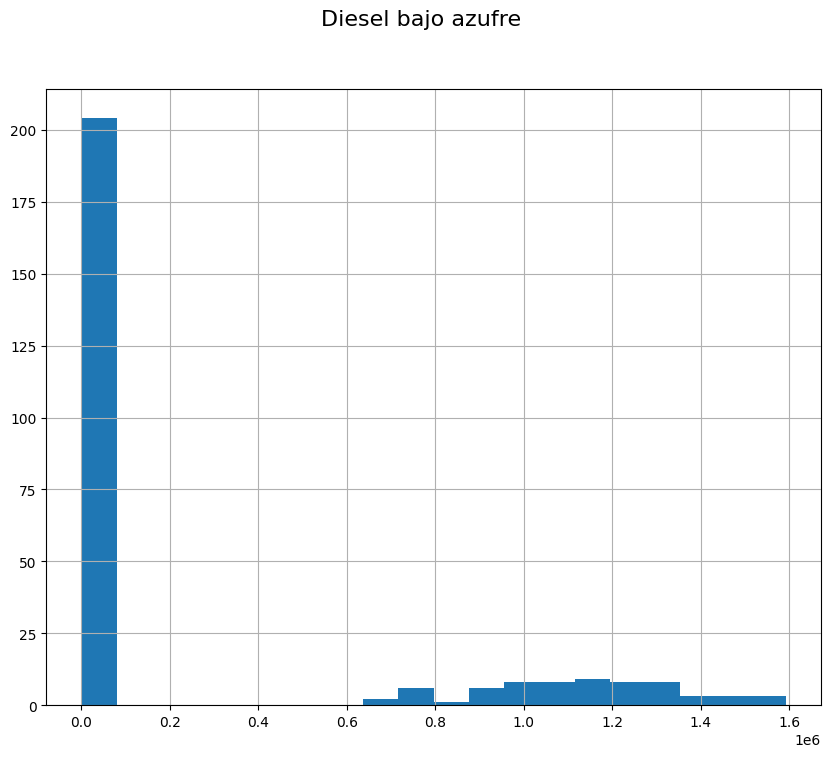

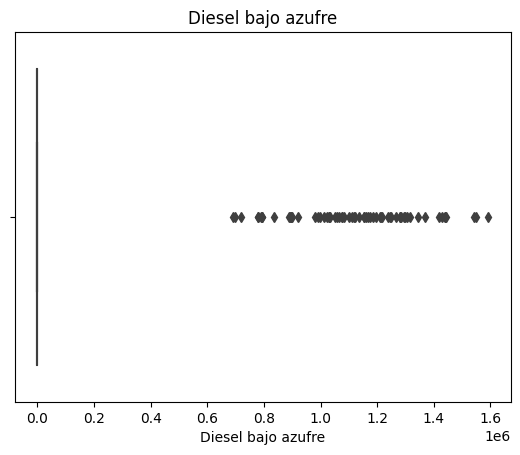

In [1500]:
# Diesel bajo azufre.
print(df["Diesel bajo azufre"])

print(df["Diesel bajo azufre"].describe())

# Histogramas de todas las columnas numéricas
df["Diesel bajo azufre"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Diesel bajo azufre', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Diesel bajo azufre', data=df)
plt.title('Diesel bajo azufre')
plt.show()

0      566101.99
1      489525.80
2      575559.68
3      437745.42
4      552609.13
         ...    
264         0.00
265         0.00
266         0.00
267         0.00
268         0.00
Name: Diesel alto azufre, Length: 269, dtype: float64
count    2.690000e+02
mean     5.932604e+05
std      3.955986e+05
min      0.000000e+00
25%      3.219529e+05
50%      6.836644e+05
75%      8.508069e+05
max      1.595699e+06
Name: Diesel alto azufre, dtype: float64


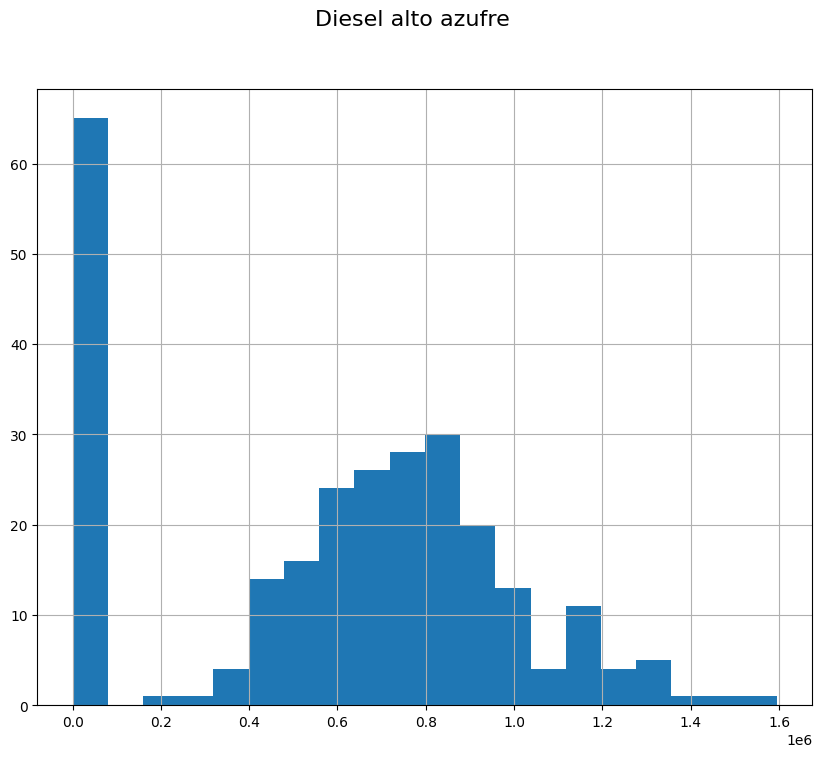

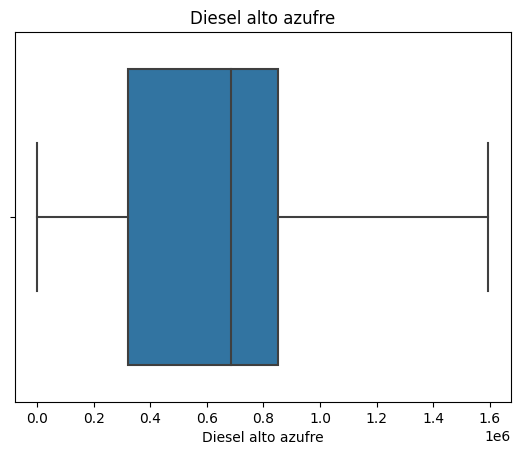

In [1501]:
# Diesel alto azufre
print(df["Diesel alto azufre"])

print(df["Diesel alto azufre"].describe())

# Histogramas de todas las columnas numéricas
df["Diesel alto azufre"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Diesel alto azufre', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Diesel alto azufre', data=df)
plt.title('Diesel alto azufre')
plt.show()

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
         ...   
264    45074.97
265        0.00
266     4985.21
267    21503.98
268    15047.82
Name: Diesel ultra bajo azufre, Length: 269, dtype: float64
count      269.000000
mean      2644.297993
std       8639.971237
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      48945.910000
Name: Diesel ultra bajo azufre, dtype: float64


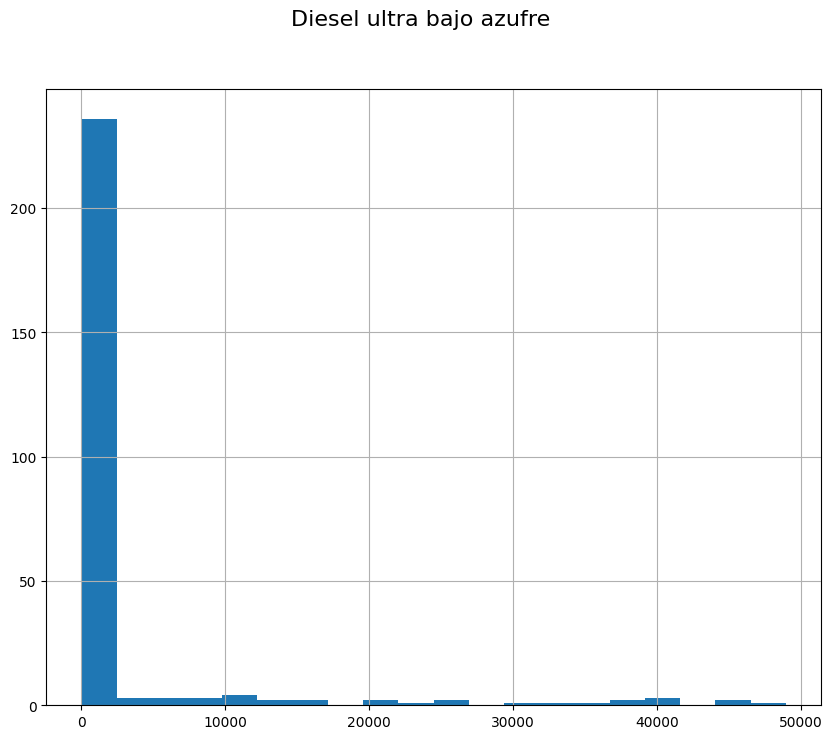

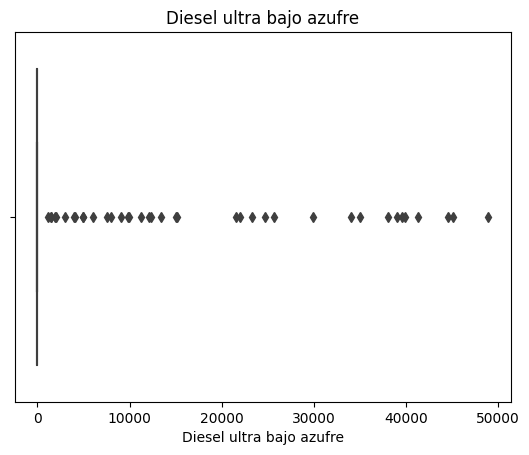

In [1502]:
# Diesel ultra bajo azufre
print(df["Diesel ultra bajo azufre"])

print(df["Diesel ultra bajo azufre"].describe())

# Histogramas de todas las columnas numéricas
df["Diesel ultra bajo azufre"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Diesel ultra bajo azufre', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Diesel ultra bajo azufre', data=df)
plt.title('Diesel ultra bajo azufre')
plt.show()

0      194065.738095
1      170703.380952
2      161837.371429
3      163048.642857
4      171518.861905
           ...      
264    497780.690000
265    652984.710000
266    711978.350000
267    647666.300000
268    713348.990000
Name: Gas licuado de petróleo, Length: 269, dtype: float64
count       269.000000
mean     399026.255764
std      190173.418737
min      100561.466667
25%      218257.510952
50%      396363.050000
75%      540671.880952
max      960840.530000
Name: Gas licuado de petróleo, dtype: float64


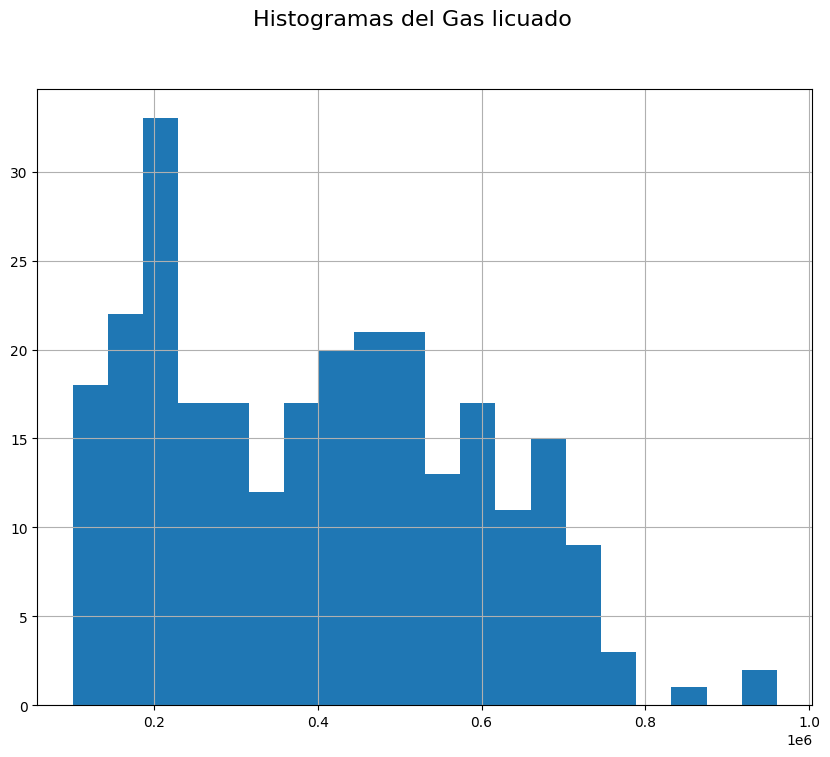

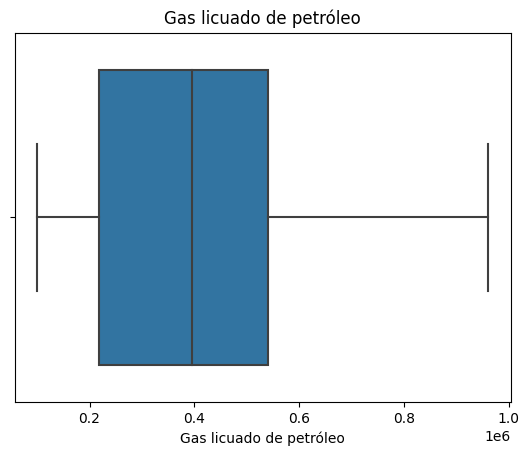

In [1503]:
# Gas licuado de petróleo
print(df["Gas licuado de petróleo"])

print(df["Gas licuado de petróleo"].describe())

# Histogramas de todas las columnas numéricas
df["Gas licuado de petróleo"].hist(bins=20, figsize=(10, 8))
plt.suptitle('Histogramas del Gas licuado', fontsize=16)
plt.show()

# Haciendo un boxplot de la columna.
sns.boxplot(x='Gas licuado de petróleo', data=df)
plt.title('Gas licuado de petróleo')
plt.show()

#### Verificando los meses en los que hay más importaciones.

0     2001-01-01
1     2001-02-01
2     2001-03-01
3     2001-04-01
4     2001-05-01
         ...    
264   2023-01-01
265   2023-02-01
266   2023-03-01
267   2023-04-01
268   2023-05-01
Name: Fecha, Length: 269, dtype: datetime64[ns]
0      1
1      2
2      3
3      4
4      5
      ..
264    1
265    2
266    3
267    4
268    5
Name: mes, Length: 269, dtype: int32
mes
1     6.551964e+07
2     5.943550e+07
3     6.868623e+07
4     6.407447e+07
5     6.624585e+07
6     5.667567e+07
7     5.614741e+07
8     5.626350e+07
9     5.222438e+07
10    5.782820e+07
11    5.724037e+07
12    6.157861e+07
Name: Total importación, dtype: float64


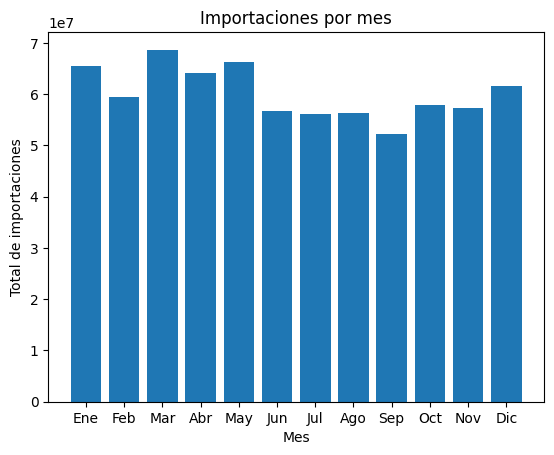

mes
3     6.868623e+07
5     6.624585e+07
1     6.551964e+07
4     6.407447e+07
12    6.157861e+07
2     5.943550e+07
10    5.782820e+07
11    5.724037e+07
6     5.667567e+07
8     5.626350e+07
7     5.614741e+07
9     5.222438e+07
Name: Total importación, dtype: float64
El mes con más importaciones fue: March


In [1504]:
# Cambio de formato.

df['Fecha'] = pd.to_datetime(df['Fecha'])

# Imprimiendo la fecha.
print(df["Fecha"])

df['mes'] = df['Fecha'].dt.month

# Imprimiendo el mes.
print(df["mes"])

# Calculando las importaciones por mes.
importaciones_por_mes = df.groupby('mes')['Total importación'].sum()

print(importaciones_por_mes)

# Ordenar los meses por orden cronológico
importaciones_por_mes = importaciones_por_mes.sort_index()

# Gráfico de barras para mostrar las importaciones por mes
plt.bar(importaciones_por_mes.index, importaciones_por_mes.values)
plt.xlabel('Mes')
plt.ylabel('Total de importaciones')
plt.title('Importaciones por mes')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

# Obteniendo los meses con más exportación en orden descendente.
meses_mas_importaciones = importaciones_por_mes.sort_values(ascending=False)
print(meses_mas_importaciones)


# Ordenar los meses por orden cronológico
importaciones_por_mes = importaciones_por_mes.sort_index()

# Obtener el nombre del mes con más importaciones
mes_max_importaciones = importaciones_por_mes.idxmax()

# Obtener el nombre del mes usando el módulo calendar
nombre_mes_max_importaciones = calendar.month_name[mes_max_importaciones]

print("El mes con más importaciones fue:", nombre_mes_max_importaciones)

#### Viendo el comportamiento de las exportaciones comprendido entre el 2018 hasta el 2023

0     2001-01-01
1     2001-02-01
2     2001-03-01
3     2001-04-01
4     2001-05-01
         ...    
264   2023-01-01
265   2023-02-01
266   2023-03-01
267   2023-04-01
268   2023-05-01
Name: Fecha, Length: 269, dtype: datetime64[ns]
0      1
1      2
2      3
3      4
4      5
      ..
264    1
265    2
266    3
267    4
268    5
Name: mes, Length: 269, dtype: int32
mes
1     6.551964e+07
2     5.943550e+07
3     6.868623e+07
4     6.407447e+07
5     6.624585e+07
6     5.667567e+07
7     5.614741e+07
8     5.626350e+07
9     5.222438e+07
10    5.782820e+07
11    5.724037e+07
12    6.157861e+07
Name: Total importación, dtype: float64


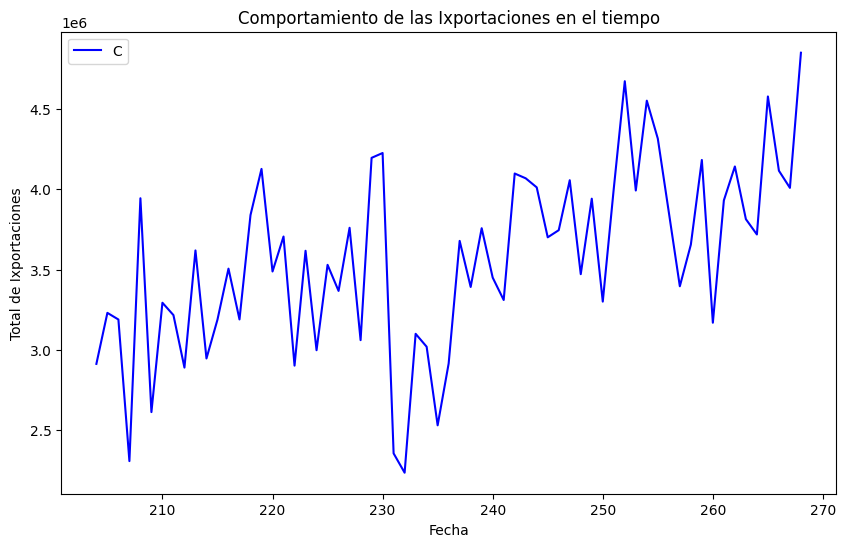

In [1505]:
# Cambio de formato.

df['Fecha'] = pd.to_datetime(df['Fecha'])

# Imprimiendo la fecha.
print(df["Fecha"])

df['mes'] = df['Fecha'].dt.month

# Imprimiendo el mes.
print(df["mes"])

# Calculando las importaciones por mes.
importaciones_por_mes = df.groupby('mes')['Total importación'].sum()

print(importaciones_por_mes)

# Filtrar el DataFrame para incluir solo datos desde 2018 hasta 2023
df = df[(df['Fecha'] >= '2018-01-01') & (df['Fecha'] <= '2023-12-31')]

# Gráfico de línea para mostrar el comportamiento de las exportaciones en el tiempo
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Total importación'], label='Importaciones desde el 2018 hasta el 2023', color='b')
plt.xlabel('Fecha')
plt.ylabel('Total de Ixportaciones')
plt.title('Comportamiento de las Ixportaciones en el tiempo')
plt.legend("Compartamiento desde el 2018 hasta el 2023")
plt.show()


#### Comportamiento de la importación durante la pandemia

204   2018-01-01
205   2018-02-01
206   2018-03-01
207   2018-04-01
208   2018-05-01
         ...    
264   2023-01-01
265   2023-02-01
266   2023-03-01
267   2023-04-01
268   2023-05-01
Name: Fecha, Length: 65, dtype: datetime64[ns]
204    1
205    2
206    3
207    4
208    5
      ..
264    1
265    2
266    3
267    4
268    5
Name: mes, Length: 65, dtype: int32
mes
1     2.131839e+07
2     2.249465e+07
3     2.401840e+07
4     2.117984e+07
5     2.238413e+07
6     1.651291e+07
7     1.661294e+07
8     1.760061e+07
9     1.544022e+07
10    1.869802e+07
11    1.714551e+07
12    1.852302e+07
Name: Total importación, dtype: float64


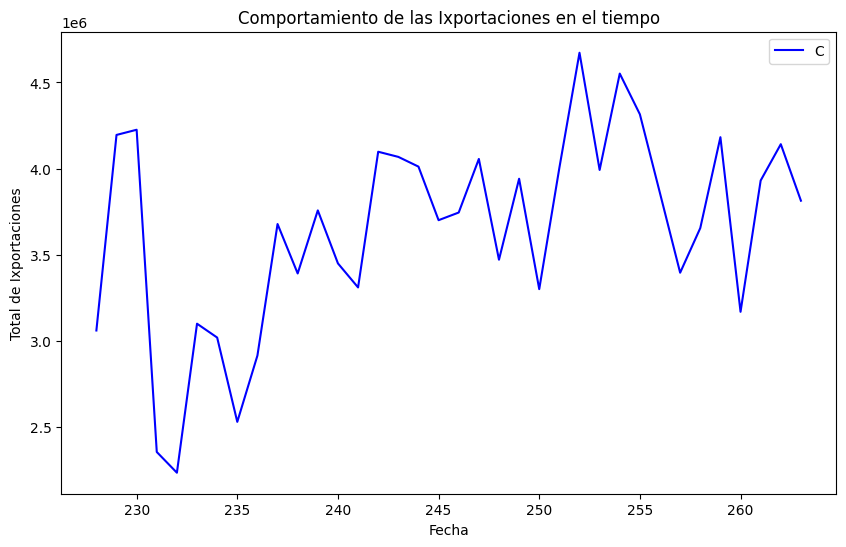

In [1506]:
# Cambio de formato.

df['Fecha'] = pd.to_datetime(df['Fecha'])

# Imprimiendo la fecha.
print(df["Fecha"])

df['mes'] = df['Fecha'].dt.month

# Imprimiendo el mes.
print(df["mes"])

# Calculando las importaciones por mes.
importaciones_por_mes = df.groupby('mes')['Total importación'].sum()

print(importaciones_por_mes)

# Filtrar el DataFrame para incluir solo datos desde 2018 hasta 2023
df = df[(df['Fecha'] >= '2020-01-01') & (df['Fecha'] <= '2022-12-31')]

# Gráfico de línea para mostrar el comportamiento de las exportaciones en el tiempo
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Total importación'], label='Importaciones desde el 2018 hasta el 2023', color='b')
plt.xlabel('Fecha')
plt.ylabel('Total de Ixportaciones')
plt.title('Comportamiento de las Ixportaciones en el tiempo')
plt.legend("Compartamiento desde el 2018 hasta el 2023")
plt.show()


####  Picos en importaciones por año por tipo de combustibles

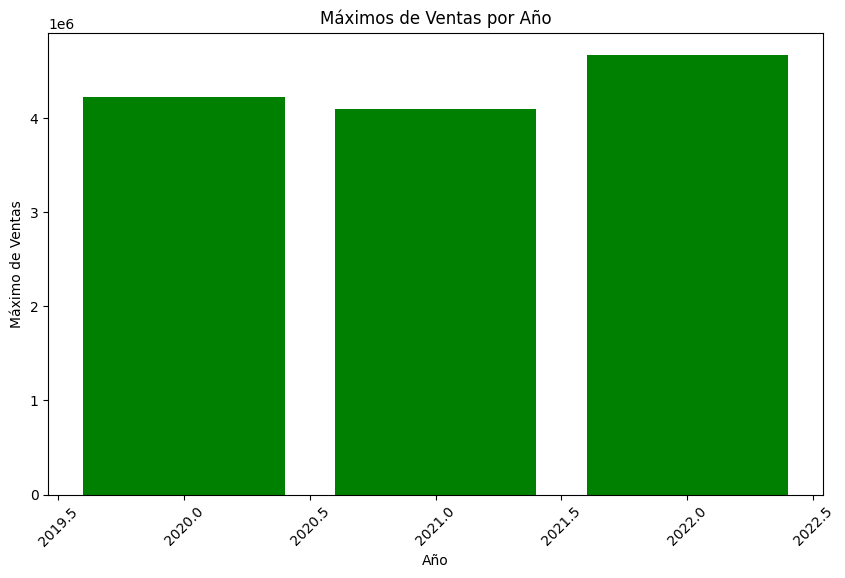

In [1507]:
# Patrones de nombres de columnas relacionadas con tipos de combustible
patrones_combustible = r'Gasolina|Diesel|Gas licuado de petróleo'

# Filtrar las columnas relacionadas con tipos de combustible
columnas_combustible = df.filter(regex=patrones_combustible)

# Convertir la columna de fecha al tipo de dato 'datetime'
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Extraer el año de la columna de fecha
df['Año'] = df['Fecha'].dt.year

# Obteniendo el máximo de ventas por año
maximo_ventas = df.groupby('Año').max()

# Visualizar los máximos de ventas en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(maximo_ventas.index, maximo_ventas['Total importación'], color='g')
plt.xlabel('Año')
plt.ylabel('Máximo de Ventas')
plt.title('Máximos de Ventas por Año')
plt.xticks(rotation=45)
plt.show()

#### Analizando la correlación entre las gasolinas y el total de importación.

                          Diesel bajo azufre  Diesel ultra bajo azufre   
Diesel bajo azufre                  1.000000                  0.155028  \
Diesel ultra bajo azufre            0.155028                  1.000000   
Gasolina superior                   0.503870                  0.103238   
Diesel alto azufre                       NaN                       NaN   
Gasolina regular                    0.395611                 -0.033806   
Gas licuado de petróleo             0.011612                 -0.199601   
Total importación                   0.782976                 -0.008097   

                          Gasolina superior  Diesel alto azufre   
Diesel bajo azufre                 0.503870                 NaN  \
Diesel ultra bajo azufre           0.103238                 NaN   
Gasolina superior                  1.000000                 NaN   
Diesel alto azufre                      NaN                 NaN   
Gasolina regular                   0.404844                 NaN   
Gas l

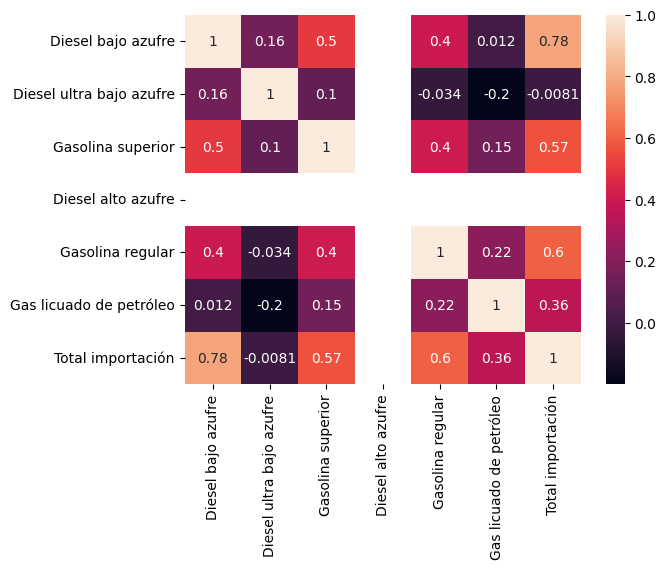

In [1508]:
# Selecciona las columnas de interés
columns_of_interest = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', "Gasolina regular",'Gas licuado de petróleo', "Total importación"]
subset_df = df[columns_of_interest]

# Calcula la matriz de correlación
correlation_matrix = subset_df.corr()

# Muestra la matriz de correlación
print(correlation_matrix)

# Graficando la matriz de correlación.
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#### Haciendo análisis de correlación cruzada

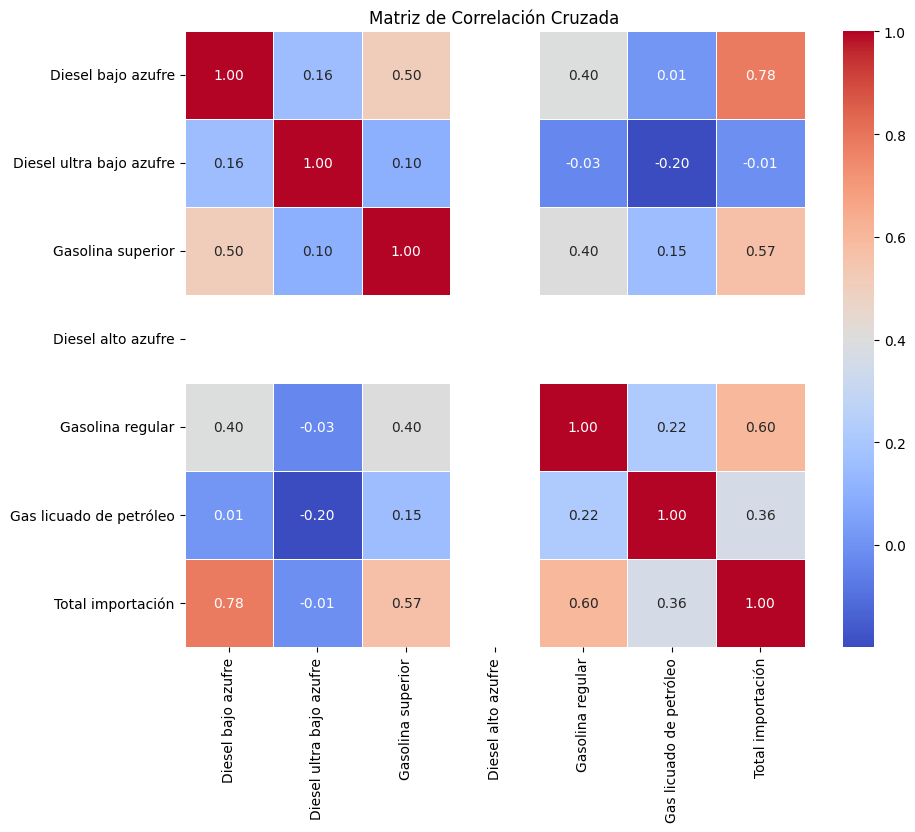

In [1509]:
# Selecciona las columnas de interés
gasolina_columns = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', 'Gasolina regular', 'Gas licuado de petróleo']
total_import_column = 'Total importación'

# Crea un DataFrame con las columnas de gasolina y el total de importación
gasolina_total_import_df = df[gasolina_columns + [total_import_column]]

# Calcula la matriz de correlación cruzada
correlation_matrix = gasolina_total_import_df.corr()

# Grafica el mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación Cruzada')
plt.show()

#### Comparación de las importaciones de los productos

In [1510]:
# Selecciona las columnas de interés para el análisis de comparación
product_columns = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', 'Gasolina regular', 'Gas licuado de petróleo']

# Calcula la suma de importaciones para cada producto
total_imports_by_product = df[product_columns].sum()

# Muestra la comparación de las importaciones para cada producto
print(total_imports_by_product)

Diesel bajo azufre          4.072828e+07
Diesel ultra bajo azufre    3.951415e+05
Gasolina superior           2.223256e+07
Diesel alto azufre          0.000000e+00
Gasolina regular            2.554468e+07
Gas licuado de petróleo     2.208297e+07
dtype: float64


#### Análisis de outliers de las variables.

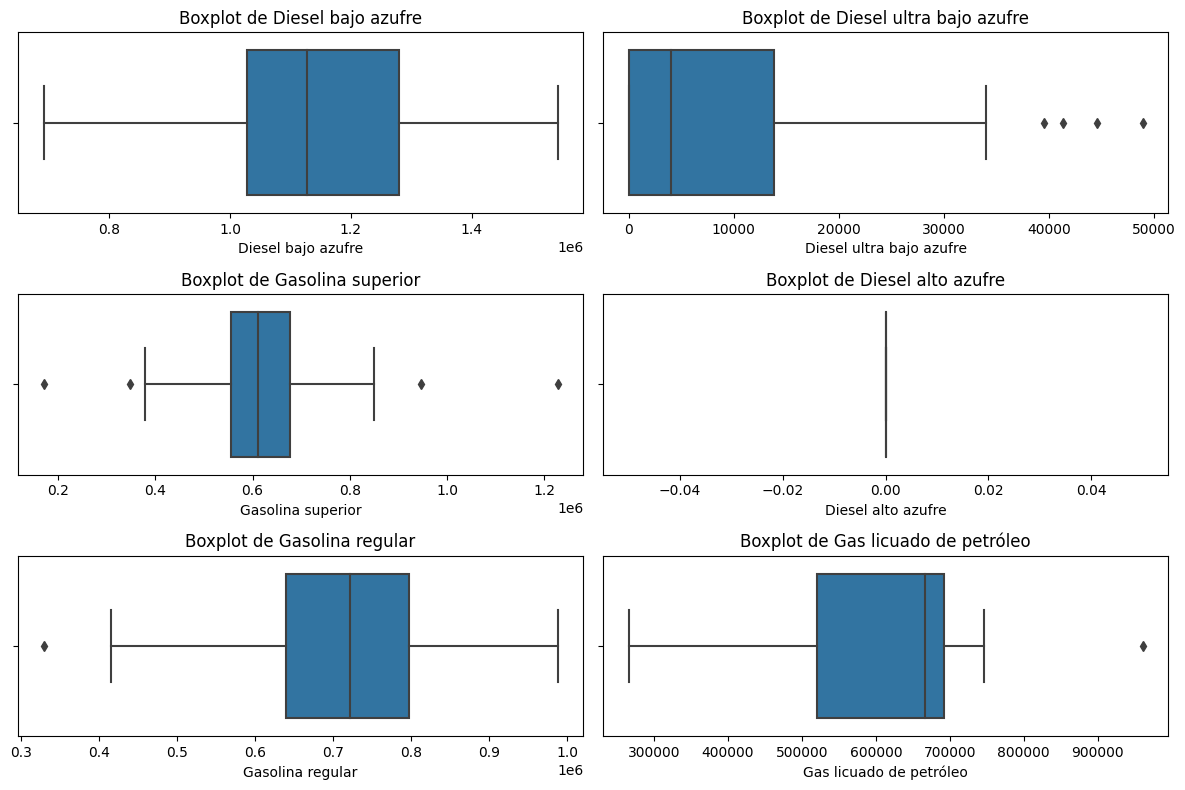

In [1511]:
# Selecciona las columnas de interés para el análisis de outliers
outlier_columns = ['Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gasolina superior', 'Diesel alto azufre', 'Gasolina regular', 'Gas licuado de petróleo']

# Crea un subplot de tamaño 3x2 para visualizar los boxplots
plt.figure(figsize=(12, 8))

# Itera sobre cada columna para crear los boxplots
for i, column in enumerate(outlier_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

### Inciso 2: Consumo mensual de gasolina super, gasolina regular, diésel y gas licuado.

Index(['Fecha', 'Aceites lubricantes', 'Asfalto ', 'Bunker', 'Ceras',
       'Combustible turbo jet', 'Diesel bajo azufre',
       'Diesel ultra bajo azufre', 'Gas licuado de petróleo',
       'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior',
       'Grasas lubricantes', 'Kerosina', 'Mezclas oleosas', 'Naftas',
       'Petcoke', 'Petróleo crudo', 'Solventes', 'Butano',
       'Diesel alto azufre', 'MTBE', 'Orimulsión', 'Petróleo reconstituido',
       'Total importación', 'mes', 'Año'],
      dtype='object')


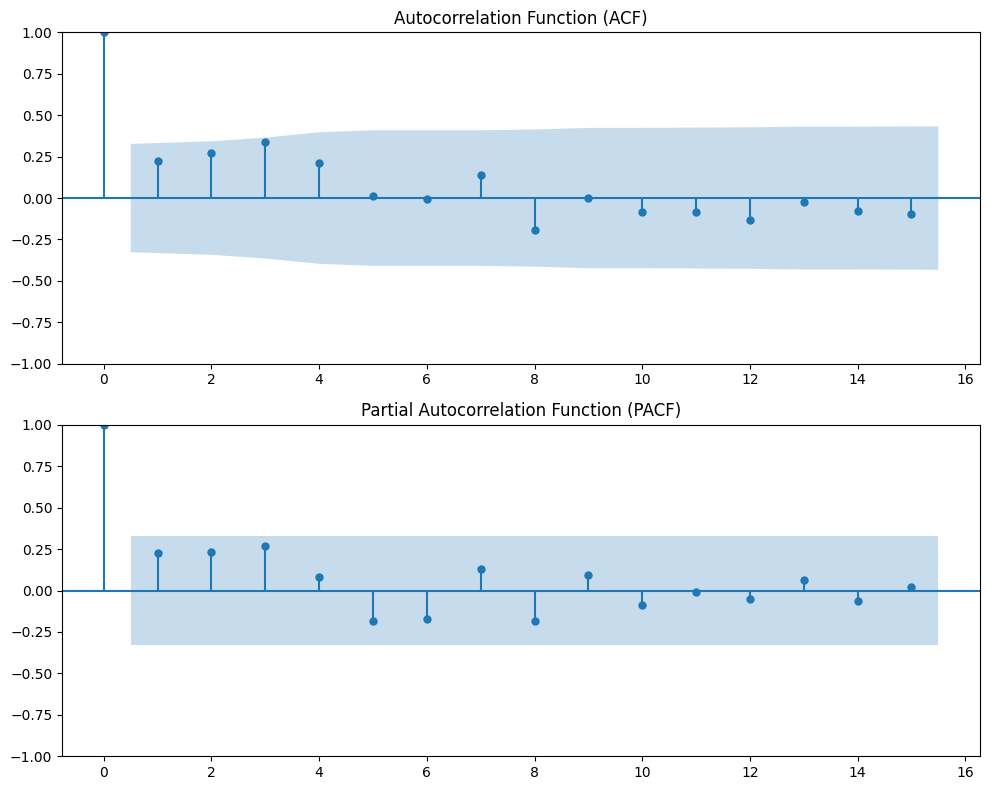

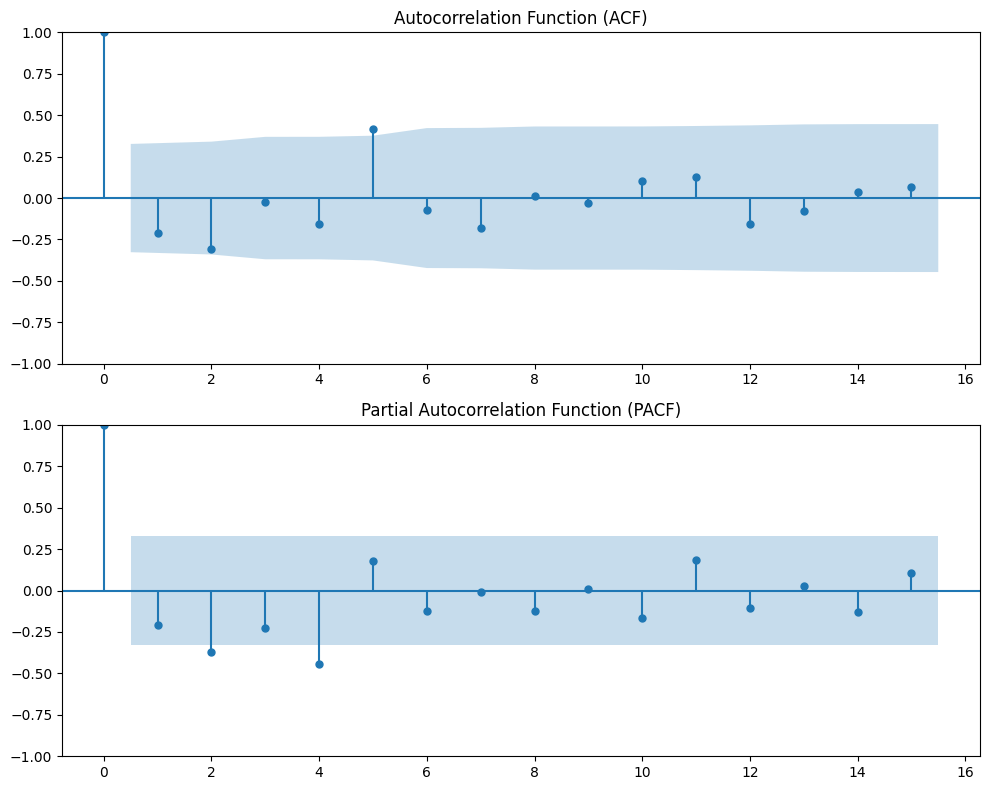

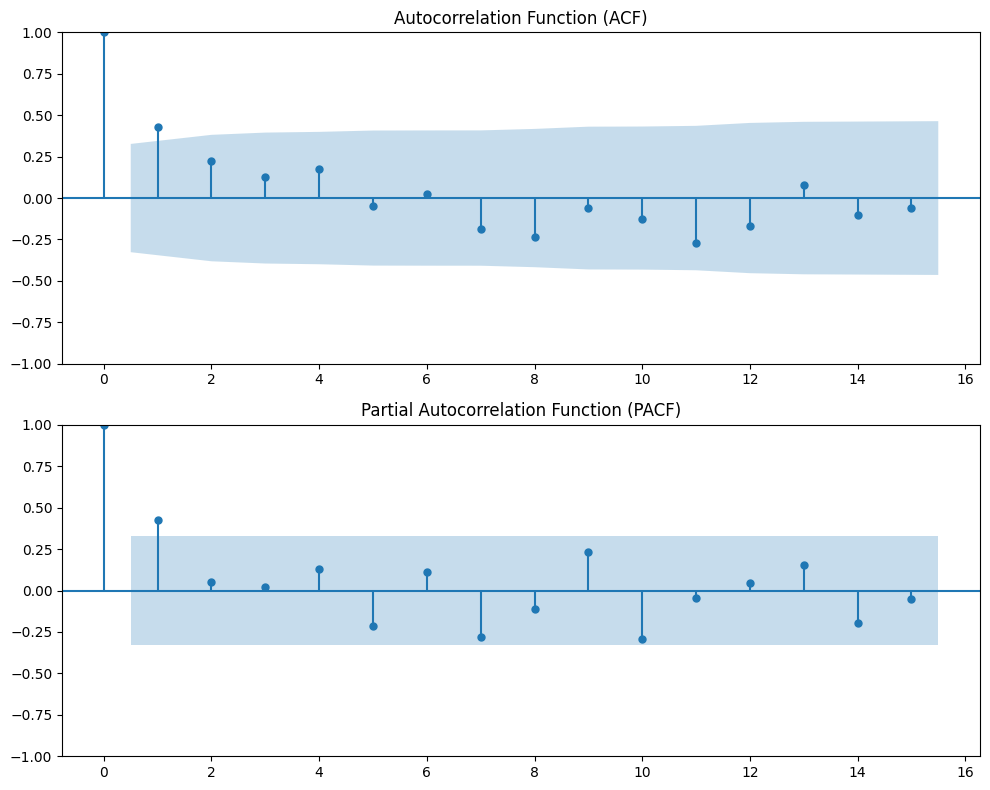

c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


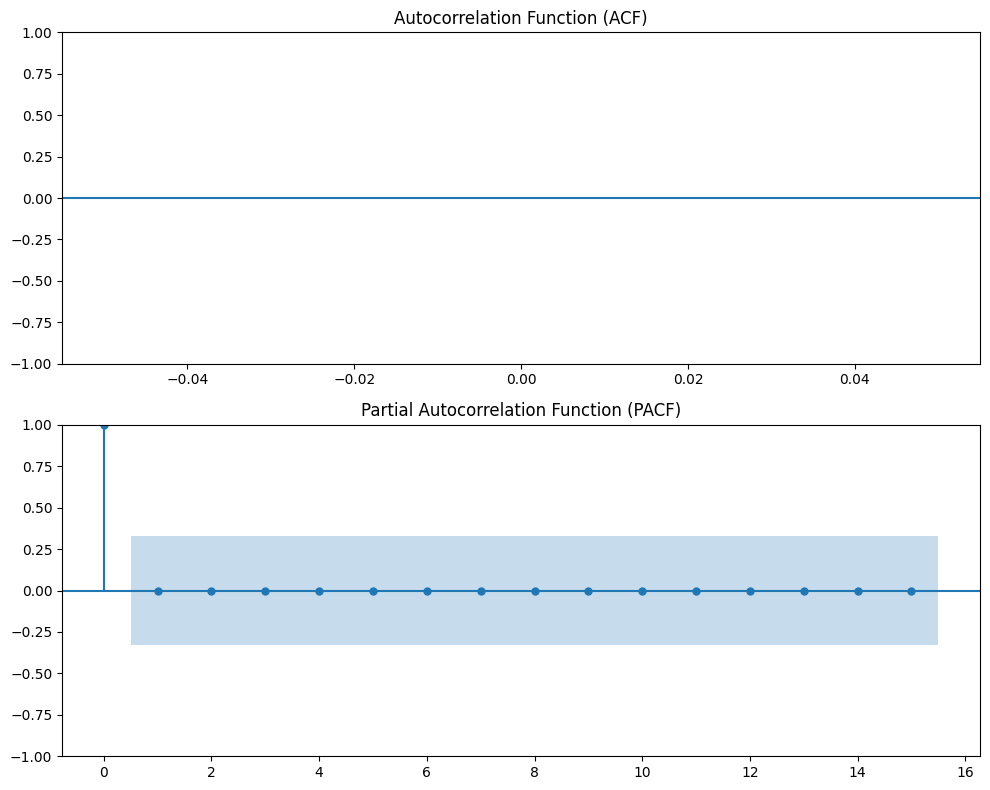

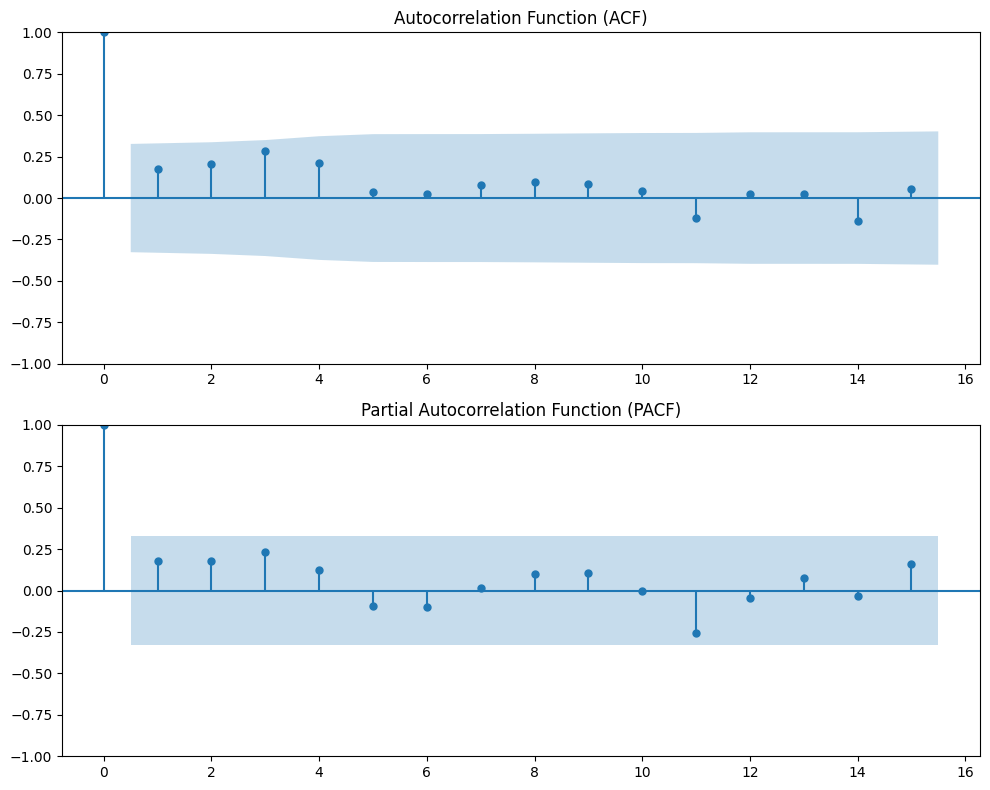

In [1512]:
print(df.columns)

# Convierte la columna de fechas a formato de fecha
df['mes'] = pd.to_datetime(df['mes'])

def plot_acf_pacf(data, lags=15):
    # Crea subplots para los gráficos ACF y PACF
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # Gráfico ACF
    plot_acf(data, lags=lags, ax=ax[0])
    ax[0].set_title('Autocorrelation Function (ACF)')

    # Gráfico PACF
    plot_pacf(data, lags=lags, ax=ax[1])
    ax[1].set_title('Partial Autocorrelation Function (PACF)')

    plt.tight_layout()
    plt.show()

# Convierte la columna de fechas a índice para trabajar con series de tiempo
df.set_index('mes', inplace=True)

# Visualización de gráficos ACF y PACF para cada serie de tiempo
plot_acf_pacf(df['Diesel bajo azufre'])
plot_acf_pacf(df['Diesel ultra bajo azufre'])
plot_acf_pacf(df['Gasolina superior'])
plot_acf_pacf(df['Diesel alto azufre'])
plot_acf_pacf(df['Gasolina regular'])

#### Haciendo una predicción de gasolina regular.

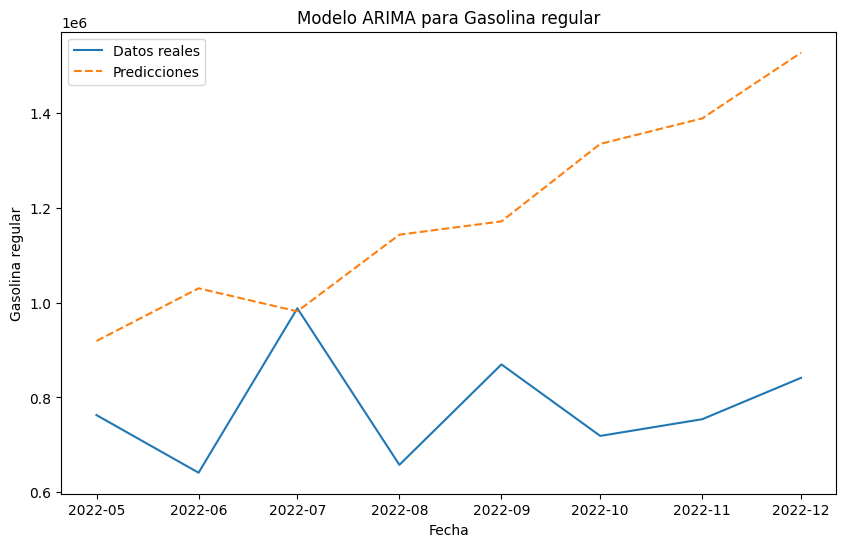

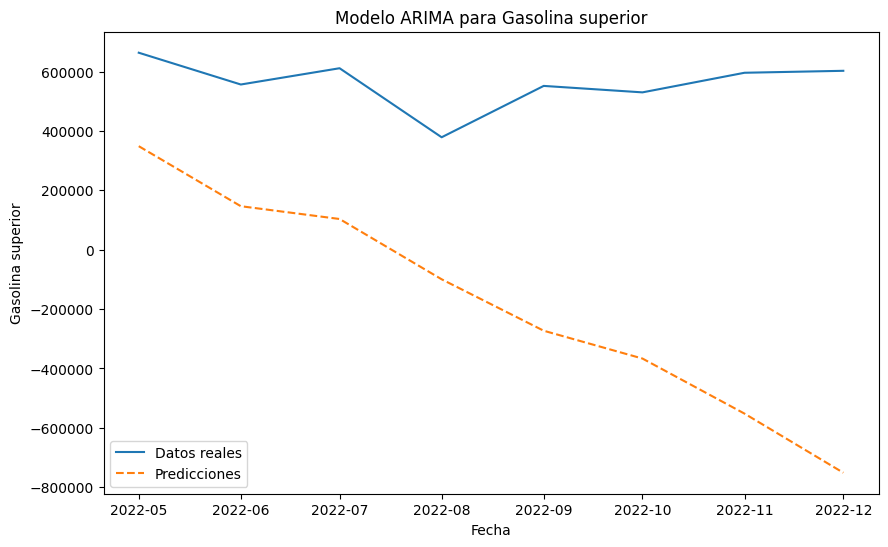

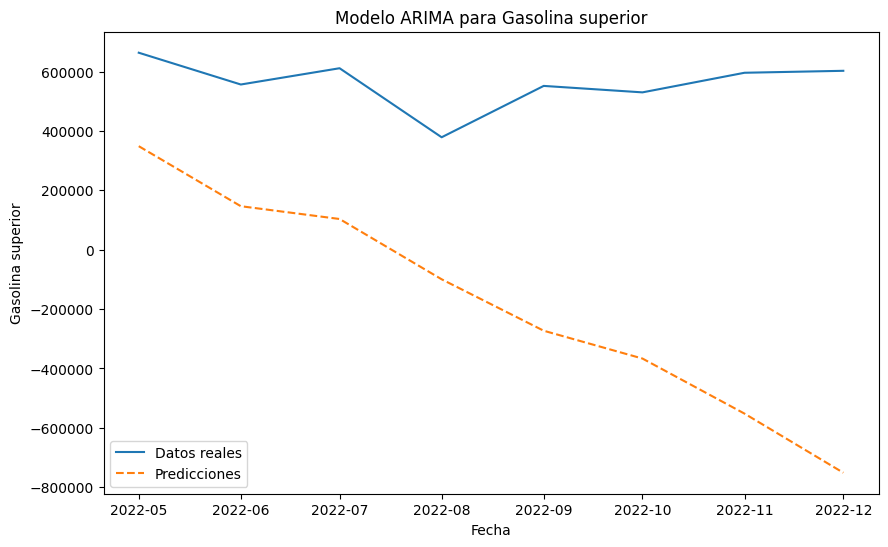

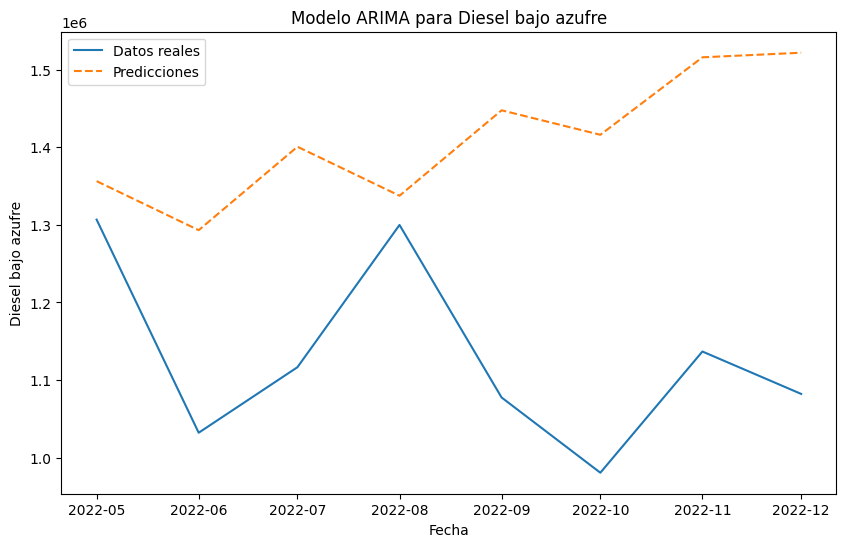

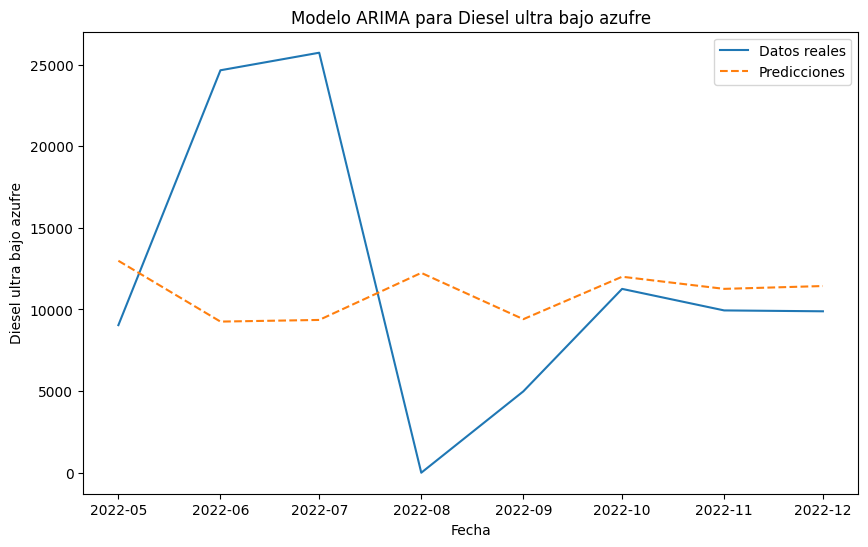

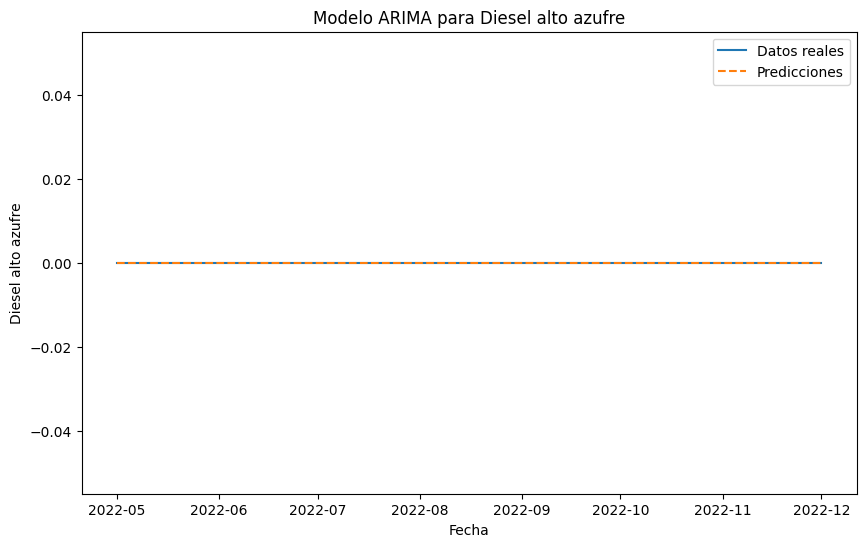

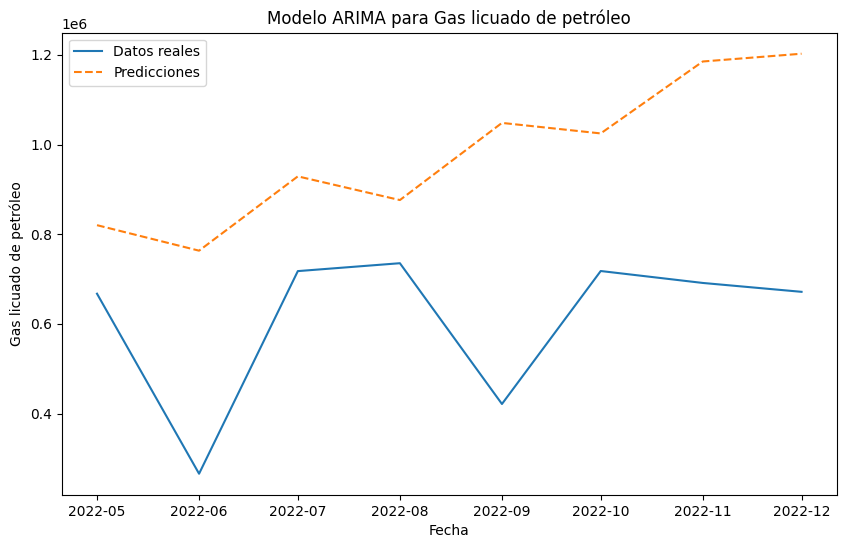

In [1513]:
# Convierte la columna de fechas a formato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Convierte la columna de fechas a índice para trabajar con series de tiempo
df.set_index('Fecha', inplace=True)

# Usando la gasolina regular.
variable_interes = 'Gasolina regular'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA
order = (4, 4, 4)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Usando la gasolina superior.
variable_interes = 'Gasolina superior'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (3, 3, 3)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Usando la gasolina superior.
variable_interes = 'Gasolina superior'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (3, 3, 3)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Usando la Diesel bajo azufre.
variable_interes = 'Diesel bajo azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (3, 3, 3)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Usando la Diesel Diesel ultra bajo azufre.
variable_interes = 'Diesel ultra bajo azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (2, 2, 2)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

# Usando el Diesel alto azufre.
variable_interes = 'Diesel alto azufre'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (2, 2, 2)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()


# Usando el Gas licuado de petróleo.
variable_interes = 'Gas licuado de petróleo'

# Usando un 80% para el entrenamiento.
train_size = int(len(df) * 0.8)
train_data = df[variable_interes][:train_size]
test_data = df[variable_interes][train_size:]

# Crea el modelo ARIMA para la gasolina superior.
order = (3, 3, 3)  # Valores para p, d, q
model = ARIMA(train_data, order=order)

# Ajusta el modelo a los datos de entrenamiento
model_fit = model.fit()

# Haciendo las predicciones.
predictions = model_fit.forecast(steps=len(test_data))

# Visualización de las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_data, label='Datos reales')
plt.plot(df.index[train_size:], predictions, label='Predicciones', linestyle='dashed')
plt.xlabel('Fecha')
plt.ylabel(variable_interes)
plt.legend()
plt.title('Modelo ARIMA para ' + variable_interes)
plt.show()

#### Haciendo una predicción de gasolina superior.